In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [80]:
#df.describe()

In [81]:
#df.info()

In [82]:
#df.isnull().sum()

In [83]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [84]:
#Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 
#'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).
data = df.drop(columns='stab')
#data = df.drop('stab', axis =1)
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [85]:
X = data.drop(columns = 'stabf')

In [86]:
y = data['stabf']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [88]:
y_test.value_counts()

unstable    1288
stable       712
Name: stabf, dtype: int64

In [89]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainTransformed = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_testTransformed = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [91]:
#Use scikit learn to train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix 
rf = RandomForestClassifier(random_state =1)
rf.fit(X_trainTransformed, y_train)
rf_y_pred = rf.predict(X_testTransformed)
accuracy = accuracy_score(y_test, rf_y_pred)
recall = recall_score(y_test, rf_y_pred, pos_label = 'stable')
precision = precision_score(y_test, rf_y_pred, pos_label = 'stable')
f1 = f1_score(y_test, rf_y_pred, pos_label = 'stable')
cnf_mat = confusion_matrix(y_test, rf_y_pred, labels=['stable', 'unstable'])
#print('accuracy:{}'.format(round(accuracy*100),2))
#print('recall:{}'.format(round(recall*100),2))
#print('precision:{}'.format(round(precision*100),2))
#print('f1:{}'.format(round(f1*100),2))
print('confusion_matrix:\n', cnf_mat)
print('classification_report:\n',classification_report(y_test, rf_y_pred, digits=4))

rf_result = pd.DataFrame([['RandomForestClassifier', accuracy, precision, recall, f1]], columns=list(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))
rf_result

confusion_matrix:
 [[ 625   87]
 [  55 1233]]
classification_report:
               precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.929,0.919118,0.877809,0.897989


tau1    0.124432
tau2    0.126307
tau3    0.122057
tau4    0.121401
p1      0.029132
p2      0.031411
p3      0.029956
p4      0.029475
g1      0.090765
g2      0.097689
g3      0.100325
g4      0.097048
dtype: float64

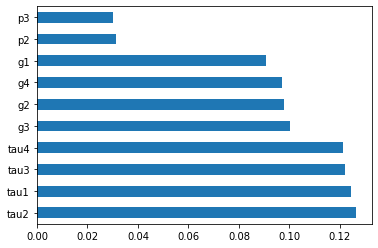

In [92]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
feat_importances

In [93]:
#Use scikit learn to train an extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

dec_tree = ExtraTreesClassifier(random_state =1)
dec_tree.fit(X_trainTransformed, y_train)
dec_tree_y_pred = dec_tree.predict(X_testTransformed)
accuracy = accuracy_score(y_test, dec_tree_y_pred)
recall = recall_score(y_test, dec_tree_y_pred, pos_label = 'stable')
precision = precision_score(y_test, dec_tree_y_pred, pos_label = 'stable')
f1 = f1_score(y_test, dec_tree_y_pred, pos_label = 'stable')
cnf_mat = confusion_matrix(y_test, dec_tree_y_pred, labels=['stable', 'unstable'])
#print('accuracy:{}'.format(round(accuracy*100),2))
#print('recall:{}'.format(round(recall*100),2))
#print('precision:{}'.format(round(precision*100),2))
#print('f1:{}'.format(round(f1*100),2))
print('confusion_matrix:\n', cnf_mat)
print('classification_report:\n',classification_report(y_test, dec_tree_y_pred, digits=4))


dec_tree_result = pd.DataFrame([['ExtraTreesClassifier', accuracy, precision, recall, f1]], columns=list(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))
dec_tree_result

confusion_matrix:
 [[ 606  106]
 [  38 1250]]
classification_report:
               precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



,Model,Accuracy,Precision,Recall,F1 Score
0,ExtraTreesClassifier,0.928,0.940994,0.851124,0.893805


tau1    0.117397
tau2    0.118445
tau3    0.113169
tau4    0.115466
p1      0.039507
p2      0.040371
p3      0.040706
p4      0.040579
g1      0.089783
g2      0.093676
g3      0.096883
g4      0.094019
dtype: float64

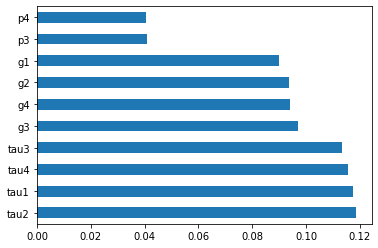

In [94]:
feat_importances = pd.Series(dec_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
feat_importances

In [95]:
#And use xgboost to train an extreme boosting model
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state=1)
xgbc.fit(X_trainTransformed, y_train)
xg_y_pred = xgbc.predict(X_testTransformed)
accuracy = accuracy_score(y_test, xg_y_pred)
recall = recall_score(y_test, xg_y_pred, pos_label = 'stable')
precision = precision_score(y_test, xg_y_pred, pos_label = 'stable')
f1 = f1_score(y_test, xg_y_pred, pos_label = 'stable')
cnf_mat = confusion_matrix(y_test, xg_y_pred, labels=['stable', 'unstable'])
print('accuracy:{}'.format(round(accuracy*100),2))
print('recall:{}'.format(round(recall*100),2))
print('precision:{}'.format(round(precision*100),2))
print('f1:{}'.format(round(f1*100),2))
print('confusion_matrix:\n', cnf_mat)
print('classification_report:\n',classification_report(y_test, xg_y_pred, digits=4))

xgbc_result = pd.DataFrame([['xgboost', accuracy, precision, recall, f1]], columns=list(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))
xgbc_result

accuracy:95.0
recall:91.0
precision:94.0
f1:92.0
confusion_matrix:
 [[ 648   64]
 [  45 1243]]
classification_report:
               precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000



,Model,Accuracy,Precision,Recall,F1 Score
0,xgboost,0.9455,0.935065,0.910112,0.92242


In [96]:
#And use xgboost to train an extreme boosting model
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state=1, max_depth=3, learning_rate=0.1)
xgbc.fit(X_trainTransformed, y_train)
xg_y_pred = xgbc.predict(X_testTransformed)
accuracy = accuracy_score(y_test, xg_y_pred)
recall = recall_score(y_test, xg_y_pred, pos_label = 'stable')
precision = precision_score(y_test, xg_y_pred, pos_label = 'stable')
f1 = f1_score(y_test, xg_y_pred, pos_label = 'stable')
cnf_mat = confusion_matrix(y_test, xg_y_pred, labels=['stable', 'unstable'])
print('accuracy:{}'.format(round(accuracy*100),2))
print('recall:{}'.format(round(recall*100),2))
print('precision:{}'.format(round(precision*100),2))
print('f1:{}'.format(round(f1*100),2))
print('confusion_matrix:\n', cnf_mat)
print('classification_report:\n',classification_report(y_test, xg_y_pred, digits=4))


xgbc_result = pd.DataFrame([['xgboost', accuracy, precision, recall, f1]], columns=list(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))
xgbc_result

accuracy:92.0
recall:85.0
precision:92.0
f1:88.0
confusion_matrix:
 [[ 603  109]
 [  52 1236]]
classification_report:
               precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



,Model,Accuracy,Precision,Recall,F1 Score
0,xgboost,0.9195,0.920611,0.84691,0.882224


tau1    0.147953
tau2    0.136673
tau3    0.143265
tau4    0.136926
p1      0.010606
p2      0.000000
p3      0.000000
p4      0.000000
g1      0.104849
g2      0.101431
g3      0.107922
g4      0.110375
dtype: float32

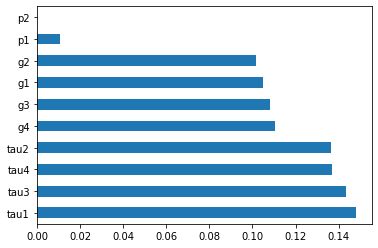

In [97]:
feat_importances = pd.Series(xgbc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
feat_importances

In [98]:
#And use lightgbm to train a light gradient boosting model
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state = 1)
lgbmc.fit(X_trainTransformed, y_train)
lg_y_pred = lgbmc.predict(X_testTransformed)
accuracy = accuracy_score(y_test, lg_y_pred)
recall = recall_score(y_test, lg_y_pred, pos_label = 'stable')
precision = precision_score(y_test, lg_y_pred, pos_label = 'stable')
f1 = f1_score(y_test, lg_y_pred, pos_label = 'stable')
cnf_mat = confusion_matrix(y_test, lg_y_pred, labels=['stable', 'unstable'])
print('accuracy:{}'.format(round(accuracy*100),2))
print('recall:{}'.format(round(recall*100),2))
print('precision:{}'.format(round(precision*100),2))
print('f1:{}'.format(round(f1*100),2))
print('confusion_matrix:\n', cnf_mat)
print('classification_report:\n',classification_report(y_test, lg_y_pred, digits=4))


lgbmc_result = pd.DataFrame([['lightgbm', accuracy, precision, recall, f1]], columns=list(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))
lgbmc_result

accuracy:94.0
recall:89.0
precision:93.0
f1:91.0
confusion_matrix:
 [[ 635   77]
 [  48 1240]]
classification_report:
               precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



,Model,Accuracy,Precision,Recall,F1 Score
0,lightgbm,0.9375,0.929722,0.891854,0.910394


tau1    400
tau2    373
tau3    364
tau4    401
p1       16
p2       25
p3       23
p4       15
g1      349
g2      350
g3      339
g4      345
dtype: int32

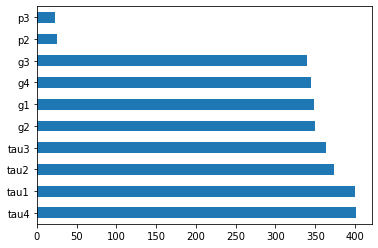

In [99]:
feat_importances = pd.Series(lgbmc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
feat_importances

In [100]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [101]:
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [102]:
#random_search = RandomizedSearchCV(estimator = dec_tree, param_distributions=hyperparameter_grid)

In [103]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomizedSearchCV(dec_tree, hyperparameter_grid, random_state=1)
random_search = model.fit(X_trainTransformed, y_train)

In [104]:
#model.fit(X_trainTransformed, y_train)

In [105]:
#checking for the best parameter for the model
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [106]:
#experimenting with this parameter to test the model's performance
best_tree_param = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state=1)
best_tree_param.fit(X_trainTransformed, y_train)
best_tree_y_pred = best_tree_param.predict(X_testTransformed)

In [107]:
accuracy = accuracy_score(y_test, best_tree_y_pred)
recall = recall_score(y_test, best_tree_y_pred, pos_label = 'stable')
precision = precision_score(y_test, best_tree_y_pred, pos_label = 'stable')
f1 = f1_score(y_test, best_tree_y_pred, pos_label = 'stable')
cnf_mat = confusion_matrix(y_test, best_tree_y_pred, labels=['stable', 'unstable'])
print('accuracy:{}'.format(round(accuracy*100),2))
print('recall:{}'.format(round(recall*100),2))
print('precision:{}'.format(round(precision*100),2))
print('f1:{}'.format(round(f1*100),2))
print('confusion_matrix:\n', cnf_mat)
print('classification_report:\n',classification_report(y_test, best_tree_y_pred, digits=4))

best_tree_param_result = pd.DataFrame([['ExtraTrees_BestParameters', accuracy, precision, recall, f1]], columns=list(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))
best_tree_param_result

accuracy:93.0
recall:87.0
precision:92.0
f1:89.0
confusion_matrix:
 [[ 619   93]
 [  53 1235]]
classification_report:
               precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



,Model,Accuracy,Precision,Recall,F1 Score
0,ExtraTrees_BestParameters,0.927,0.921131,0.869382,0.894509


tau1    0.137240
tau2    0.140508
tau3    0.134680
tau4    0.135417
p1      0.003683
p2      0.005337
p3      0.005429
p4      0.004962
g1      0.102562
g2      0.107578
g3      0.113063
g4      0.109541
dtype: float64

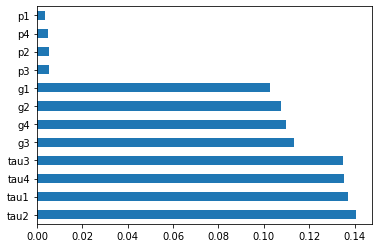

In [108]:
feat_importances = pd.Series(best_tree_param.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
feat_importances

In [112]:
results =rf_result.append([dec_tree_result, xgbc_result, lgbmc_result, best_tree_param_result])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.9290,0.919118,0.877809,0.897989
0,ExtraTreesClassifier,0.9280,0.940994,0.851124,0.893805
0,xgboost,0.9195,0.920611,0.846910,0.882224
0,lightgbm,0.9375,0.929722,0.891854,0.910394
0,ExtraTrees_BestParameters,0.9270,0.921131,0.869382,0.894509
